# **Final Project Task 4 - Census Modeling Clustering**

Requirements:

Load Data
- Use the preprocessed dataset from Task 1.

Prepare Features
- Feature Selection:
    - Select relevant numerical and categorical features.
    - Note: K-Means works best with numerical data.
- Data Preprocessing:
    - Be sure you have normalized numerical features (e.g., using MinMaxScaler or StandardScaler) and categorical features encoded properly (e.g., One-Hot Encoding or Ordinal Encoding).
    
Clustering Model Implementation
- Apply K-Means Clustering:
    - Experiment with different values of K (number of clusters).
    - Use the Elbow Method to determine the optimal number of clusters:
    - Use yellowbrick.cluster.KElbowVisualizer to find the best K.
    - Calculate the Silhouette Score to evaluate cluster separation.
- Alternative Clustering Approaches:
    - Experiment with Hierarchical Clustering.
    - Experiment with DBSCAN

Visualize & Interpret Clusters
- Dimensionality Reduction:
    - Apply PCA or t-SNE to reduce dimensions and visualize clusters in 2D.
- Cluster Analysis:
    - Plot the clusters in 2D space.
    - Identify key characteristics of each group.
    - Use only numerical variables to interpret the clusters.
- Example insights:
    - "Older individuals tend to work fewer hours per week."
    - "High-income individuals belong to a specific cluster."

Evaluate Cluster Quality
- Silhouette Score:
    - Compute the Silhouette Score to measure cluster compactness and separation. Higher values indicate better clustering results.
- Cluster Distribution:
    - Analyze how well the data points are distributed across clusters.


Deliverables:
- Notebook code with no errors.
- Visualizations & Analysis:
- Elbow method plot for K selection.
- 2D visualization of clusters.
- Summary of cluster characteristics.
- Cluster evaluation metrics (Silhouette Score).






In [1]:
# Importam librariile necesare pentru clustering si evaluare, cat si pentru vizualizarea elbow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [2]:
# data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
# columns = [
#     "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
#     "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
#     "hours-per-week", "native-country", "income"
# ]

# data_raw = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
# data_raw.sample(10)

## Importam datele din tema 1

In [3]:
dataa = pd.read_csv("clean_data_T1.csv")
dataa.sample(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_encode,sex_encode,usa_yes_no,workclass_Local-gov,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
14732,0.839461,-0.490031,-0.026710,-0.231441,-0.217328,40,0,1,1,False,...,False,False,False,False,False,False,False,False,False,True
762,-0.333729,-0.666310,-0.416698,-0.231441,-0.217328,40,0,1,0,True,...,False,False,False,False,True,False,False,False,False,True
19419,-0.773675,-0.157684,-0.416698,-0.231441,-0.217328,40,0,0,1,False,...,False,True,False,False,False,False,False,False,False,True
7238,0.619488,2.783176,-0.416698,0.894889,-0.217328,32,0,1,1,False,...,False,False,False,False,False,False,False,False,False,True
2421,0.252866,0.985381,1.143255,-0.231441,-0.217328,50,1,1,1,False,...,False,False,False,False,False,False,False,False,False,True
10874,-0.773675,-0.214667,-1.586664,-0.231441,-0.217328,50,0,1,1,False,...,False,True,False,False,False,False,False,False,False,True
14070,0.839461,-0.762298,-1.976652,-0.231441,-0.217328,48,0,1,1,False,...,False,False,False,False,False,False,False,False,False,True
7622,-1.580243,4.447152,-1.196675,-0.231441,-0.217328,40,0,0,0,False,...,False,False,False,True,False,False,False,True,False,False
26265,-1.286946,-1.106351,-0.026710,-0.231441,-0.217328,40,0,1,1,False,...,False,False,False,True,False,False,False,False,False,True
6391,0.106217,0.313424,-1.586664,-0.231441,-0.217328,32,0,0,1,False,...,False,False,False,False,False,True,False,True,False,False


In [4]:
# Selectare feature 
X = dataa.copy()

# Verificare normalizare, K-means fiind sensibil la scara datelor
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [5]:
X_scaled.shape

(32370, 44)

### Determinarea nr de clustere (elbow method)

C:\Users\vitok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\vitok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


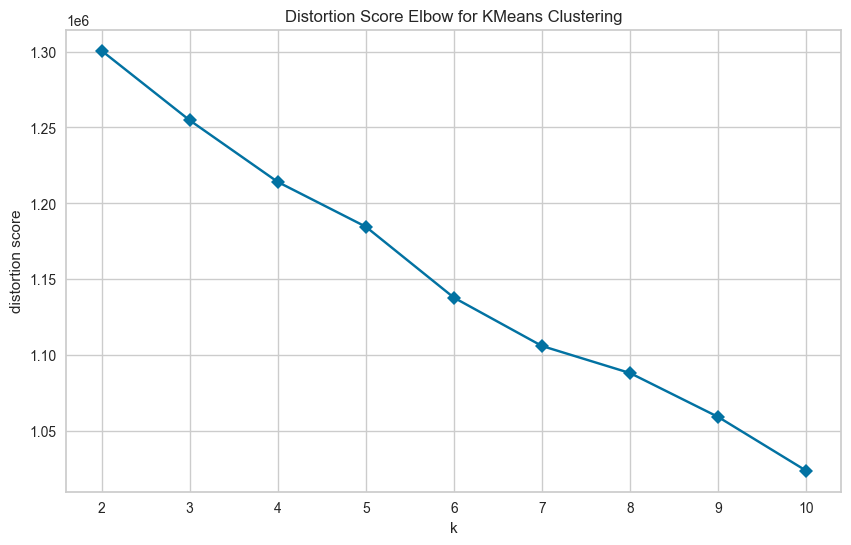

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
model = KMeans(random_state=42, n_init=10)

# KElbowVisualizer face totul automat, antreneaza pentru k=2..10 si ploteaza
visualizer = KElbowVisualizer(model, k=(2, 11), metric='distortion', timings=False)

plt.figure(figsize=(10, 6))
visualizer.fit(X_scaled) 
visualizer.show()

In [7]:
# Extragem K-ul optim detectat
optimal_k = visualizer.elbow_value_
print(f"\nNumarul optim de clustere detectat (K): {optimal_k}")
# Daca yellowbrick nu gaseste un cot clar, setam manual:
if optimal_k is None:
    optimal_k = 3  # Valoare defaul
    print(f"Elbow nedetectat automat. Setam manual K={optimal_k}")


Numarul optim de clustere detectat (K): None
Elbow nedetectat automat. Setam manual K=3


### Antrenare model pe datele scalate

In [8]:
# Antrenare model final K-Means
kmeans = KMeans(n_clusters = optimal_k, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Adaugam etichete in dateframeul original
dataa['KMeans_Cluster'] = clusters_kmeans

## Silhouette score

In [9]:
# Calcul silhouette score pe un esantion de 5000
sample_size = 5000 
if len(X_scaled) > sample_size:
    X_sample = X_scaled.sample(sample_size, random_state=42)
    labels_sample = kmeans.predict(X_sample)
    score = silhouette_score(X_sample, labels_sample)
else:
    score = silhouette_score(X_scaled, clusters_kmeans)

print(f"Silhouette Score (K={optimal_k}): {score:.4f}")

Silhouette Score (K=3): 0.0846


#### Silhouette score de 0.08 este un scor foarte mic dar pozitiv. Acesta indica o separare slaba a grupurilor, ceea ce este de asteptat in date demografice complexe, insa profilurile rezultate au sens economic.

## Clustering ierarhic

In [10]:
# Rulam pe un subset mai mic pentru a economisi timp
X_mini = X_scaled.sample(n=2000, random_state=42)
hc = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
clusters_hc = hc.fit_predict(X_mini)
print(f"Clustering Ierarhic completat pe {len(X_mini)} instante.")
print(f"Silhouette Score (HC, K={optimal_k}): {silhouette_score(X_mini, clusters_hc):.4f}")

Clustering Ierarhic completat pe 2000 instante.
Silhouette Score (HC, K=3): 0.0509


## Density Based (DBSCAN) -> nu cere numarul de clustere, ci distanta si min_samples 

In [11]:
# Aceasta metoda a necesitat turning fin
dbscan = DBSCAN(eps=2.5, min_samples=20)
clusters_dbscan = dbscan.fit_predict(X_scaled)
# DBSCAN eticheteaza outlierii cu -1
n_clusters_db = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
n_noise = list(clusters_dbscan).count(-1)

print(f"DBSCAN: Sunt {n_clusters_db} clustere si {n_noise} puncte de zgomot.")

DBSCAN: Sunt 150 clustere si 9767 puncte de zgomot.


In [12]:
from sklearn.metrics import silhouette_score
import numpy as np

# Pregatim datele (filtram outlierii etichetat cu -1)
# Păstrăm doar punctele care au fost asignate unui cluster
mask = clusters_dbscan != -1
X_clustered = X_scaled[mask]
labels_clustered = clusters_dbscan[mask]

# Verificam daca avem cel puțin 2 clustere valide pentru a calcula scorul
if len(set(labels_clustered)) > 1:
    # Facem esantionare dacă setul e prea mare (>5000 rows) pentru viteza
    if len(X_clustered) > 5000:
        # Alegem indici random
        indices = np.random.choice(len(X_clustered), 5000, replace=False)
        X_final = X_clustered.iloc[indices]
        labels_final = labels_clustered[indices]
    else:
        X_final = X_clustered
        labels_final = labels_clustered

    # Calculam scorul
    score_db = silhouette_score(X_final, labels_final)
    print(f"Silhouette Score (DBSCAN-fara outlieri): {score_db:.4f}")
else:
    print("0")

Silhouette Score (DBSCAN-fara outlieri): 0.3515


#### Desi DBSCAN are un scor de silhouette mai bun, a fregmentat datele in prea multe grupuri mici pentru a fi util in segmentarea datelor, asa ca am ramas la KMeans pentru interpretare

## Vizualizare si interpretare

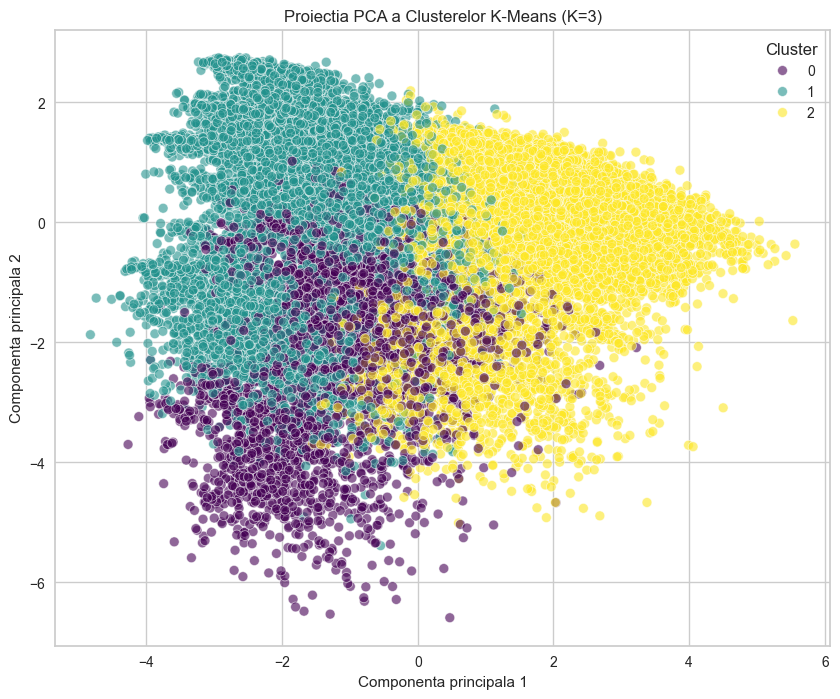

Profilul Mediu al Clusterelor
                     age  hours-per-week  education-num  capital-gain  \
KMeans_Cluster                                                          
0               0.345467       38.008598      -0.236710     -0.128017   
1              -0.574274       37.490403      -0.047216     -0.149865   
2               0.359961       43.475193       0.110109      0.160194   

                sex_encode  income_encode  
KMeans_Cluster                             
0                 0.252580       0.056965  
1                 0.548871       0.040403  
2                 0.891239       0.451364  
Distributia punctelor pe clustere
KMeans_Cluster
2    15318
1    12400
0     4652
Name: count, dtype: int64
Interpretare detaliata pe clustere
În Clusterul 0:
   - Varsta medie este de 0.3 ani.
   - Se lucreaza in medie 38.0 ore/saptamana.
   - Castigul de capital (capital-gain) mediu este -0.13.
------------------------------
În Clusterul 1:
   - Varsta medie este de -0.6 ani.
   

In [15]:
# Vizualizare 2D cu PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Cream un DataFrame pentru plotare
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = dataa['KMeans_Cluster']

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    data=pca_df,
    palette='viridis',
    alpha=0.6,
    s=50
)
plt.title(f'Proiectia PCA a Clusterelor K-Means (K={optimal_k})')
plt.xlabel('Componenta principala 1')
plt.ylabel('Componenta principala 2')
plt.legend(title='Cluster')
plt.show()

# Interpretare cluster
# grupam dupa cluster si calculam media pentru variabilele numerice importante
# Selectam cateva coloane cheie
cols_to_analyze = ['age', 'hours-per-week', 'education-num', 'capital-gain', 'sex_encode', 'income_encode']
existing_cols = [c for c in cols_to_analyze if c in dataa.columns]

print("Profilul Mediu al Clusterelor")
# Folosim df original (fara scalare), dar cu etichetele de cluster
print(dataa.groupby('KMeans_Cluster')[existing_cols].mean())

# Analiza distributiei
print("Distributia punctelor pe clustere")
print(dataa['KMeans_Cluster'].value_counts())

# Salvam tabelul cu medii intr-o variabila, sa putem extrage date din el
cluster_profile = dataa.groupby('KMeans_Cluster')[existing_cols].mean()

print("Interpretare detaliata pe clustere")

# Trecem prin fiecare cluster
for cluster_id in cluster_profile.index:
    # Extragem valorile specifice folosind .loc[rand, coloana]
    # Folosim :.1f pentru a rotunji la o zecimala (ex: 38.5)
    avg_age = cluster_profile.loc[cluster_id, 'age'] if 'age' in cluster_profile.columns else 0
    avg_hours = cluster_profile.loc[cluster_id, 'hours-per-week'] if 'hours-per-week' in cluster_profile.columns else 0
    avg_gain = cluster_profile.loc[cluster_id, 'capital-gain'] if 'capital-gain' in cluster_profile.columns else 0
    
    # Construim propozitia f-strings
    print(f"În Clusterul {cluster_id}:")  
    print(f"   - Varsta medie este de {avg_age:.1f} ani.")
    print(f"   - Se lucreaza in medie {avg_hours:.1f} ore/saptamana.")
    print(f"   - Castigul de capital (capital-gain) mediu este {avg_gain:.2f}.")
    print("-" * 30)

## Interpretarea grupurilor

### In urma aplicarii algoritmului KMeans (K=3) si a vizualizarii PCA, datele au fost segmentate in trei clustere principale care, desi prezinta o suprapunere vizibila, dezvaluie profiluri comportamentale distincte bazate pe deviatiile fata de medie.

# Concluzii si profilul clusterelor

## Pe baza analizei mediilor (unde varsta si educatia sunt standardizate, iar orele sunt valori reale), am identificat 3 segmente distincte pe piata muncii:

### Clusterul 1: Cei tineri / entry level
### Acesta este grupul cu cea mai mica medie de varsta (Z-score -0.6) si au cel mai redus program de lucru (37.5 ore/saptamana), sugerand o dominatie a joburilor part-time. Nivelul veniturilor este minim.

### Clusterul 2: High achievers 
### Acesta este cel mai numeros grup din setul de date, fiind persoane mature (Z-score 0.35) si cu cel mai inalt nivel de educatie (0.11).Acestia se disting prin orele suplimentare de lucru, avand o medie de 43.5 ore/saptamana, fiind singurul grup cu ore suplimentare semnificative. Au cea mai mare probabilitate de a avea venituri ridicate (>50K) si cele mai mari castiguri capital (0.16).

### Clusterul 0: Muncitorii average
### Desi au o varsta similara cu cei din clusterul high achievers (cluster 2), avand un Z-score de 0.34, acest grup se diferentiaza prin cel mai scazut nivel de educatie (-0.23). Lucreaza un program standard de 38 ore/saptamana, iar castigurile si veniturile raman scazute, indicand joburi stabile dar cu un plafon salarial (cel mai probabili sunt blue-collar.)



### In concluzie, analiza subliniaza rolul critic al educatiei in diferentierea veniturilor pentru persoanele de aceeasi varsta.